# **ERP and time-frequency analysis in Python and MNE**

### **Working with trial-based data in Python**

In [1]:
#Imporging necessary libraries
from scipy.io import loadmat
#Loading MATLAB data
data = loadmat('Trial-based.mat')
type(data)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EEGa', 'EEGb', 't'])

In [2]:
#View the data associated with keys
for key in data.keys():
    print(key, data[key])


__header__ b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 23 12:56:11 2012'
__version__ 1.0
__globals__ []
EEGa [[-0.18590963  0.44987601  1.06070801 ... -0.79770987 -1.27420635
   0.86740939]
 [-1.27296531 -0.04482613  1.17094627 ... -0.27280661 -0.07113736
   1.81706292]
 [-0.51537389  0.22758911  0.1262017  ...  0.1015288  -1.21639478
   0.17507807]
 ...
 [-0.36473052  0.75917791 -0.04315389 ...  1.82811111 -0.67667997
  -0.70685567]
 [-2.42409707 -0.09510218  0.77628421 ... -0.58166411 -0.85891286
  -1.24739797]
 [ 0.22897273  0.4151541  -0.20119966 ... -0.87061468  0.95545503
  -1.65280992]]
EEGb [[ 0.34505897 -1.38429155  0.67707384 ... -0.82542478  3.55902151
   1.1320362 ]
 [ 2.87668092  3.0590817  -0.27684618 ... -0.08762969 -1.88665721
   0.36815195]
 [-2.76200453  0.7735988  -0.24098119 ... -0.89488171  2.54410172
  -1.63708799]
 ...
 [-1.68974195  1.28709343  0.58593501 ...  0.01487124  2.87129371
   1.29376482]
 [-2.95198188  0.1410741  -2.03974454 ... -1.093

In [3]:
#Exctract conditions of the experiment
conditionHappyFace = data['EEGa']
conditionNonFace = data['EEGb']

#Extract time
time = data['t'][0]
%whos


Variable             Type        Data/Info
------------------------------------------
conditionHappyFace   ndarray     1000x500: 500000 elems, type `float64`, 4000000 bytes (3.814697265625 Mb)
conditionNonFace     ndarray     1000x500: 500000 elems, type `float64`, 4000000 bytes (3.814697265625 Mb)
data                 dict        n=6
key                  str         t
loadmat              function    <function loadmat at 0x0000026CC97AC4A0>
time                 ndarray     500: 500 elems, type `float64`, 4000 bytes


In [4]:
#Define number of trials
trialNumber = conditionHappyFace.shape[0]

#Define number of samples in each trial
sampleNumber = conditionHappyFace.shape[1]


In [5]:
conditionHappyFace.shape[0]

1000

In [6]:
#Print first/last trial
print(conditionHappyFace[100])

[-0.26018732 -0.54790566  0.76958788  0.065757    0.33097293 -2.10985853
 -0.10597813 -1.46181602 -0.28651374  0.31923314 -2.57983158 -0.81267052
 -0.12156397 -1.37061792  0.24623854  1.68657922 -0.74178018 -0.03947374
 -1.37832571 -1.81061592  0.78748385 -0.59967097  1.26830976 -0.00719932
  0.03417485  0.88378697  0.01080047  0.17894859  2.06774204 -0.01284165
 -2.14247429  0.22397334  0.48834692 -1.03542504 -2.31850514  2.90906829
 -0.25327166 -0.30853297 -1.10862253  0.16435919 -0.16253551  0.88983997
 -0.04455743 -0.25320367 -0.23245779  0.4401431  -1.47554558 -0.29399002
 -0.58132131 -0.97425718 -2.11806104  0.12745442 -0.39677345  0.19127505
  0.1118522   0.45875346 -0.11008145  1.05806176  0.41643416  0.50829483
 -0.27111354  0.5785977   0.83678408  0.4279422  -0.5339081   0.9545139
 -1.32277952  0.60290078  0.51975123  0.28794389 -0.7780764   2.90471917
  1.40599948 -1.28090069 -0.03224022 -0.63455365  0.31839136 -0.96763718
 -0.42031487 -1.27526581 -0.5179118  -1.58329632  0.

### **Plotting single trials**

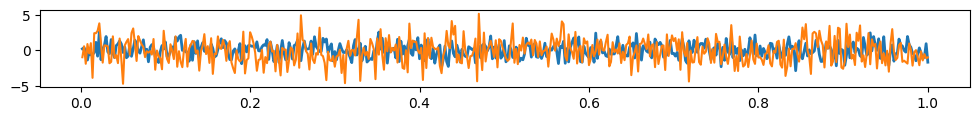

In [7]:
#Ploting one trial for each condition of the experiment
import matplotlib.pyplot as plt
plt.figure(figsize=(12,1))
plt.plot(time, conditionHappyFace[999], linewidth=2)
plt.plot(time, conditionNonFace[999])



<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Vi-1\AppData\Local\Temp\ipykernel_16824\607087731.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage [$\mu$ V]')


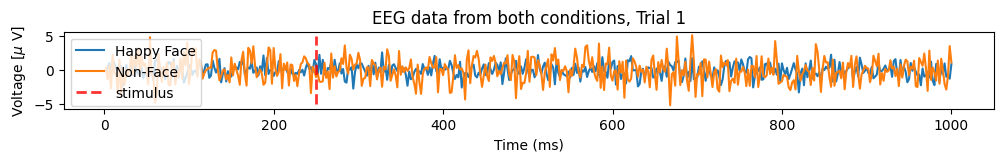

In [8]:
plt.figure(figsize=(12,1))
plt.plot(time*1000, conditionHappyFace[0], label='Happy Face')
plt.plot(time*1000, conditionNonFace[0], label='Non-Face')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage [$\mu$ V]')
plt.title('EEG data from both conditions, Trial 1')

plt.plot([250,250],[-5,5], 'r', lw=2, label='stimulus', alpha=.8, ls='--')

plt.legend()



### **Computing ERP for the conditions**

In [9]:
#Compute mean ERPs over the first (raw) dimention
ERPHappy = conditionHappyFace.mean(0)
ERPNonFace = conditionNonFace.mean(0)

### **Plotting mean ERPs**

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Vi-1\AppData\Local\Temp\ipykernel_16824\625903116.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Voltage [$\mu$ V]')


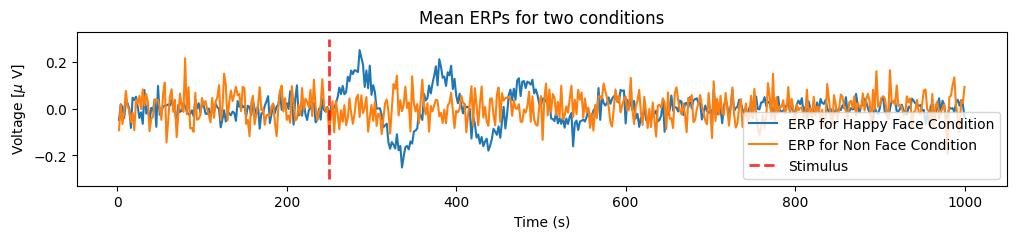

In [10]:
plt.figure(figsize=(12,2))

plt.plot(time*1000, ERPHappy, label='ERP for Happy Face Condition')
plt.plot(time*1000, ERPNonFace, label='ERP for Non Face Condition')
plt.xlabel('Time (s)')
plt.ylabel('Voltage [$\mu$ V]')
plt.title('Mean ERPs for two conditions')

plt.plot([250, 250], [-.3,.3], 'r', lw=2, label='Stimulus', alpha=0.8, ls='--')
plt.legend()


### **ERP analysis in MNE**

### **Importing EEG in MNE**

In [12]:
#importing necessary libraries
import mne
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt

#Importing EDF file
EEG = mne.io.read_raw_edf('ERD_ERS.edf', preload=True)


Extracting EDF parameters from c:\Users\Vi-1\Documents\GitHub\EEG-Preprocessing-with-MNE-Python\ERPandTF_Py_MNE\ERD_ERS.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 378499  =      0.000 ...   756.998 secs...


C:\Users\Vi-1\AppData\Local\Temp\ipykernel_16824\447705777.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  EEG = mne.io.read_raw_edf('ERD_ERS.edf', preload=True)
C:\Users\Vi-1\AppData\Local\Temp\ipykernel_16824\447705777.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  EEG = mne.io.read_raw_edf('ERD_ERS.edf', preload=True)


In [13]:
#Examine the EEG channels
EEG.ch_names

['Fp1-Av',
 'Fp2-Av',
 'F7-Av',
 'F3-Av',
 'Fz-Av',
 'F4-Av',
 'F8-Av',
 'T3-Av',
 'C3-Av',
 'Cz-Av',
 'C4-Av',
 'T4-Av',
 'T5-Av',
 'P3-Av',
 'Pz-Av',
 'P4-Av',
 'T6-Av',
 'O1-Av',
 'O2-Av',
 'LABEL']

In [14]:
#Remove desired channel
EEG.drop_channels('LABEL')

<RawEDF | ERD_ERS.edf, 19 x 378500 (757.0 s), ~54.9 MiB, data loaded>

In [15]:
EEG.ch_names

['Fp1-Av',
 'Fp2-Av',
 'F7-Av',
 'F3-Av',
 'Fz-Av',
 'F4-Av',
 'F8-Av',
 'T3-Av',
 'C3-Av',
 'Cz-Av',
 'C4-Av',
 'T4-Av',
 'T5-Av',
 'P3-Av',
 'Pz-Av',
 'P4-Av',
 'T6-Av',
 'O1-Av',
 'O2-Av']

### **Montage set**

In [16]:
montage = mne.channels.make_standard_montage('standard_1020')
EEG.set_montage(montage, on_missing='ignore')


<RawEDF | ERD_ERS.edf, 19 x 378500 (757.0 s), ~54.9 MiB, data loaded>

In [17]:
#Filter the data
EEG.filter(0.1, 30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<RawEDF | ERD_ERS.edf, 19 x 378500 (757.0 s), ~54.9 MiB, data loaded>

Using matplotlib as 2D backend.


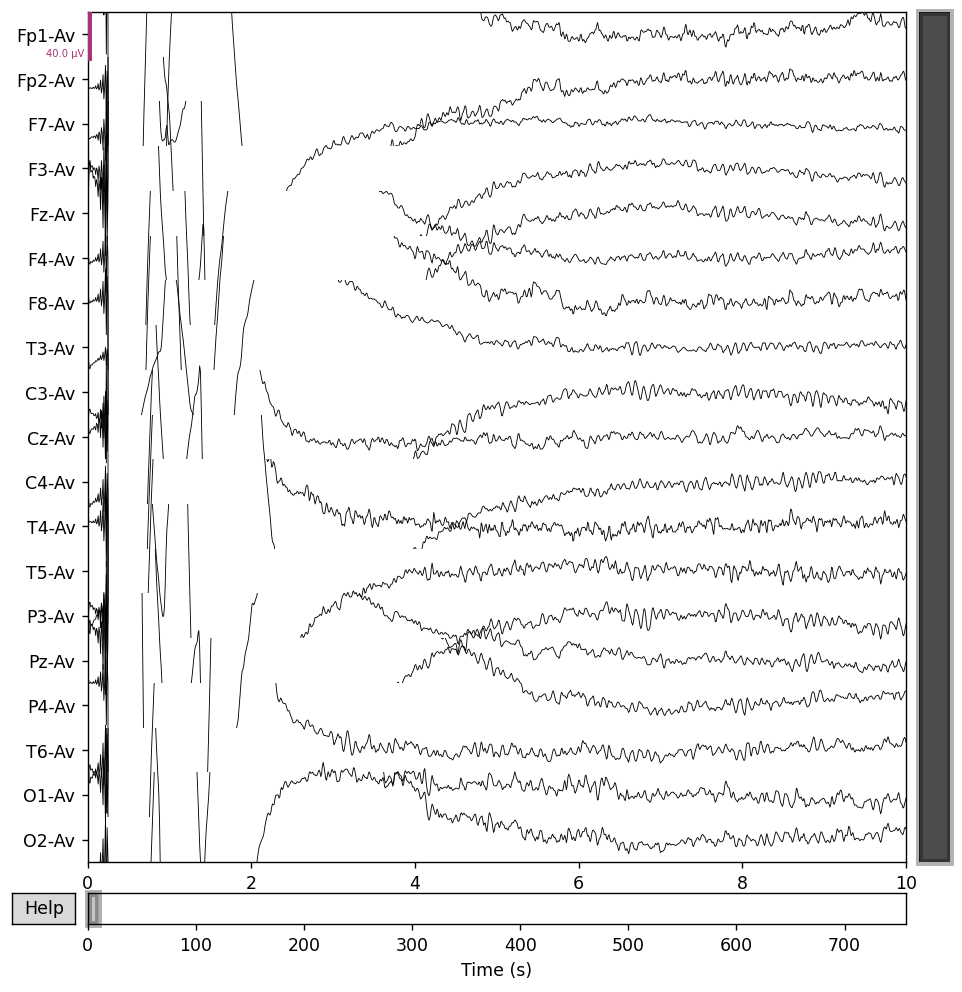

In [18]:
EEG.plot(block=False, duration=10.0)

### **Loading the Labels file and creating Events**

In [20]:
# Loading trigger codes from Labels.txt
labelsData = np.loadtxt('Labels.txt', dtype=float)
triggerCodes = labelsData[:, 0]
# Extracting sampling frequency from EEG info
sfreq = EEG.info['sfreq']

# Converting trigger codes to trigger samples
triggerSamples = (triggerCodes * sfreq ).astype(int)

# Extracting condition labels
conditionLabels = (labelsData[:,1]).astype(int)

# Creating EEG events array with trigger samples and condition labels
EEGEvents = np.column_stack((triggerSamples, np.zeros_like(triggerSamples), conditionLabels))
conditionLabels

array([1, 2, 2, 1, 3, 2, 2, 2, 1, 3, 3, 2, 2, 3, 4, 3, 1, 3, 2, 1, 2, 1,
       1, 1, 3, 4, 3, 4, 1, 1, 1, 1, 3, 2, 1, 2, 2, 1, 3, 1, 3, 1, 4, 2,
       1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 2,
       2, 2, 3, 2, 1, 1, 4, 2, 2, 2, 1, 2, 2, 3, 1, 1, 1, 3, 1, 1, 2, 1,
       1, 2, 2, 4, 2, 3, 2, 1, 2, 1, 2, 1, 1, 3, 2, 2, 3, 2, 2, 1, 1, 2,
       2, 4, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 2, 2, 3, 1, 3, 1, 2,
       2, 1, 2, 2, 2, 3, 1, 1, 4, 2, 3, 1, 1, 3, 3, 2, 1, 3, 2, 1, 2, 2,
       1, 2, 2, 2, 4, 3, 2, 1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 2, 3, 1, 1, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 3,
       3, 2, 2, 3])

### **Epoching the events for MNE**

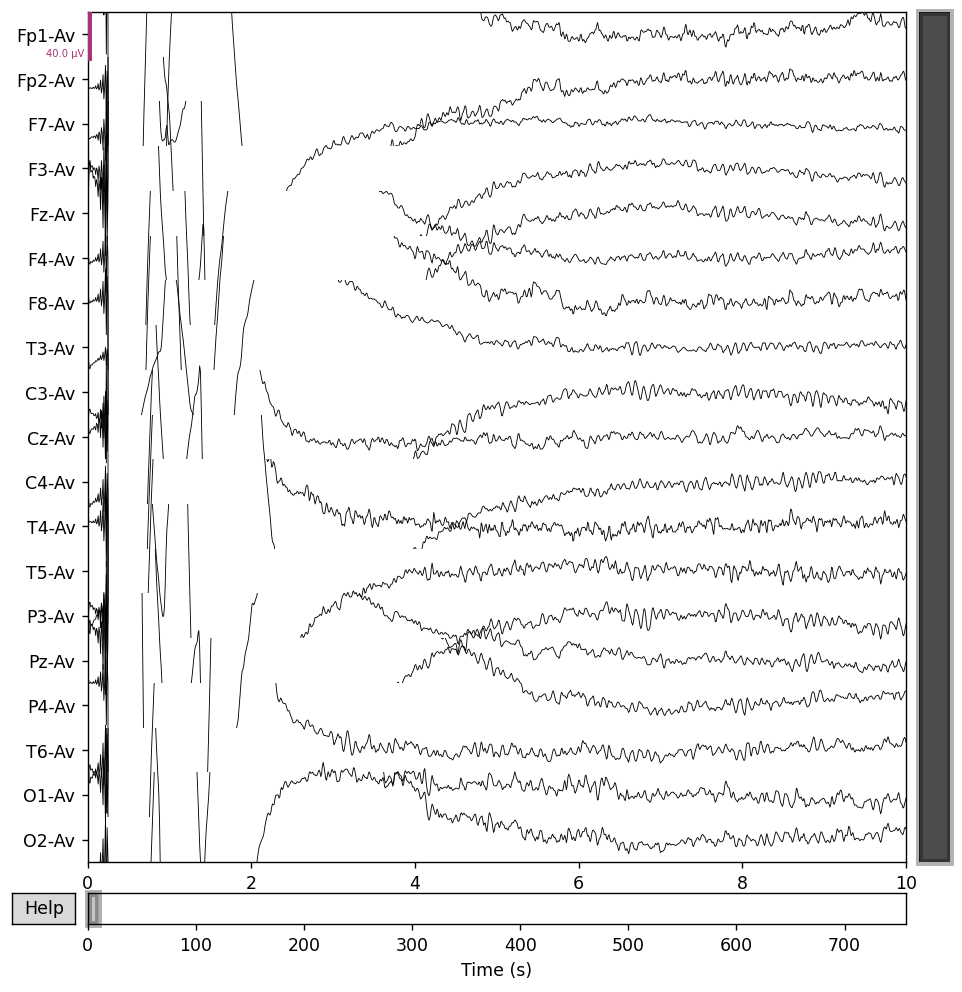

Channels marked as bad:
none


In [21]:
#Plotting and seeeing events
EEG.plot(block=False, duration=10.0, events = EEGEvents, title = 'EEG with Events')

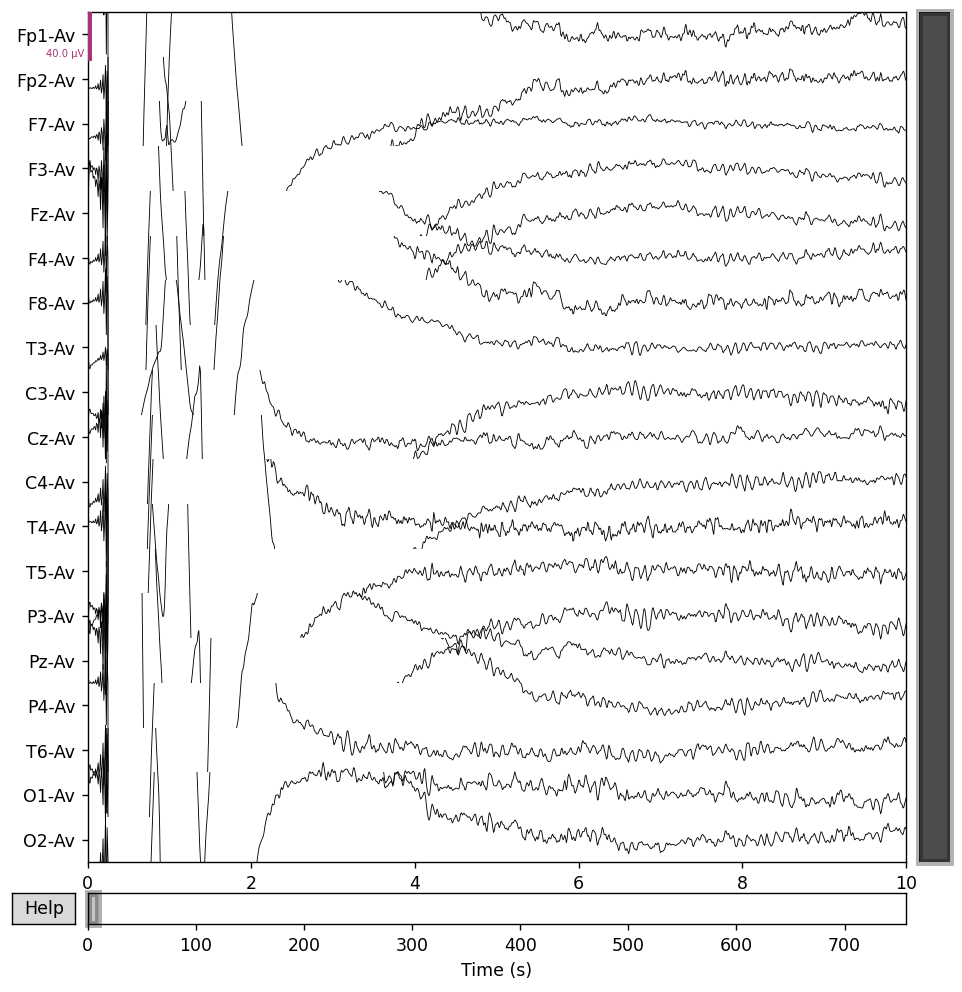

Channels marked as bad:
none


In [22]:
#Adding preferred labels for the events
eventIDs = {'Condition 1':1, 'Condition 2':2, 'Condition 3':3, 'Condition 4':4 }

EEG.plot(duration=10.0, events = EEGEvents, title='EEG with Events', event_id = eventIDs)

In [23]:
#Creating a variable for EVENTS structure
epochStart= -.2
epochEnd=2
conditionEpochs = mne.Epochs (EEG, events= EEGEvents, event_id=eventIDs, tmin=epochStart, tmax=epochEnd,
            baseline=(-0.2, 0), reject=None)
conditionEpochs

Not setting metadata
202 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


<Epochs | 202 events (good & bad), -0.2 – 2 s (baseline -0.2 – 0 s), ~21 KiB, data not loaded,
 'Condition 1': 75
 'Condition 2': 78
 'Condition 3': 39
 'Condition 4': 10>

In [24]:
#Access specific epochs
conditionEpochs['Condition 1']

<Epochs | 75 events (good & bad), -0.2 – 2 s (baseline -0.2 – 0 s), ~21 KiB, data not loaded,
 'Condition 1': 75>

### **Move epochs to different variables**

In [25]:
Condition1Epochs = conditionEpochs['Condition 1']
Condition2Epochs = conditionEpochs['Condition 2']
Condition1Epochs.get_data()[0,8,:]

Using data from preloaded Raw for 75 events and 1101 original time points ...
0 bad epochs dropped


array([-7.04392839e-07,  2.62418526e-07,  1.30356727e-06, ...,
        1.57784299e-06,  1.09052698e-06,  6.33414403e-07], shape=(1101,))

### **Compute mean ERPs**

In [26]:
averageERPCondition1 = Condition1Epochs.average()
averageERPCondition2 = Condition2Epochs.average()
averageERPCondition1

<Evoked | 'Condition 1' (average, N=75), -0.2 – 2 s, baseline -0.2 – 0 s, 19 ch, ~184 KiB>

### **Pick a channel**

In [27]:
channelForAnalysis = 'Fz-Av'
myPick = EEG.info['ch_names']
myPick = EEG.info['ch_names'].index(channelForAnalysis)

In [28]:
EEG.ch_names

['Fp1-Av',
 'Fp2-Av',
 'F7-Av',
 'F3-Av',
 'Fz-Av',
 'F4-Av',
 'F8-Av',
 'T3-Av',
 'C3-Av',
 'Cz-Av',
 'C4-Av',
 'T4-Av',
 'T5-Av',
 'P3-Av',
 'Pz-Av',
 'P4-Av',
 'T6-Av',
 'O1-Av',
 'O2-Av']

### **Mean for one channel**

In [29]:
averageERPCondition1 = Condition1Epochs.average()
averageERPCondition2 = Condition2Epochs.average()

### **Plot means for desired channels**

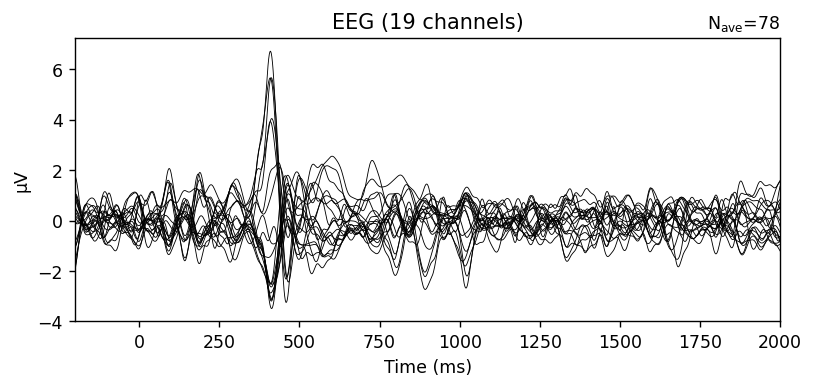

In [30]:
averageERPCondition1.plot(time_unit='ms')
averageERPCondition2.plot(time_unit='ms')

### **Time-frequency in MNE**

In [31]:
from mne.time_frequency import tfr_morlet
freqRange = np.arange(4,30,.1)
numberOfCycles = 3

TFRCondition1 = tfr_morlet(Condition1Epochs, freqRange, numberOfCycles, average=True)
TFRCondition2 = tfr_morlet(Condition2Epochs, freqRange, numberOfCycles, average=True)


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
Using data from preloaded Raw for 75 events and 1101 original time points ...


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   25.6s


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
Using data from preloaded Raw for 78 events and 1101 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   30.5s


### **Plotting time-frequency for our pick**

In [32]:
TFRCondition1

(<Average Power Estimates from Epochs (nave=75), morlet method | 19 channels × 260 freqs × 1101 times, 4.0 - 29.9 Hz, -0.20 - 2.00 s, 41.5 MiB>,
 <Inter-trial coherence from Epochs (nave=75), morlet method | 19 channels × 260 freqs × 1101 times, 4.0 - 29.9 Hz, -0.20 - 2.00 s, 41.5 MiB>)

In [33]:
TFRCondition1_Fz = TFRCondition1[0].copy()
TFRCondition1_Fz.plot(myPick, baseline=(-0.2, 0), mode='logratio',
                      title='Time-Frequency for Condition 1 (Fz)')

Applying baseline correction (mode: logratio)


[<Figure size 800x600 with 2 Axes>]